<a href="https://colab.research.google.com/github/akita-NITIchinoseki/rf/blob/main/%E7%84%A1%E7%B7%9A%E4%BF%A1%E5%8F%B7%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01_自由空間伝搬損失

Interface2021年5月号p.23を参考<br>
＜参考＞https://eiseilab.com/fspl/ <br>
<br>
図1に示されるような送信アンテナから送信される電力$P_{t}$ 
と，受信アンテナで受信する電力$P_{r}$の関係は，フリスの伝達公式より，次式で表されます。
<br>
$$
\frac{P_r}{P_t}=\left(\frac{\lambda}{4\pi d}\right)^2G_tG_r
$$
ただし，$\lambda$は波長，$d$はアンテナ間の距離，$G_{t}$は送信アンテナの利得，$G_{r}$は受信アンテナの利得です。

アンテナの絶対利得を$1$（$=$等方性アンテナ，$G_t=1$，$G_r=1$）とすると，自由空間伝達利得$G$は，次式で表される。
$$
G=\frac{P_r}{P_t}=\left(\frac{\lambda}{4\pi d}\right)^2
$$
$G$の逆数を自由空間伝搬損失$L$という。
$$
L=\frac{1}{G}=\left(\frac{4\pi d}{\lambda}\right)^2
$$
$L$は，$d$の2乗に比例し，$\lambda$の2乗に反比例する。なお，$ \lambda=\frac{c}{f}$であるから，周波数$f$の2乗に比例する。
<br>
⇒　遠ければ遠いほど，周波数が高ければ高いほど損失が多くなる（より減衰する）。
<br>
また，デシベル表記の自由空間伝搬損失$L_{dB}$は，次式で表される。
<br>
$$
L_{dB}=-10log_{10}L=-10log_{10}\left(\frac{4\pi d}{\lambda}\right)^2=-20log_{10}\left(\frac{4\pi d}{\lambda}\right)
$$
⇒　マイナスは，損失（減衰）を意味している。$10log_{10}G$と考えてよい（利得を計算してマイナスになるので損失となる）。

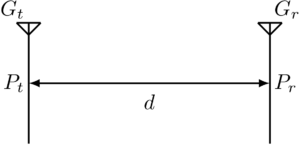
<br>
図1．送受信アンテナの位置関係



matplotで日本語を使用したいときは，以下を実行してください。

In [ ]:
!pip install japanize_matplotlib

Frequency[MHz]: 2400
Max Distance[m]: 1000


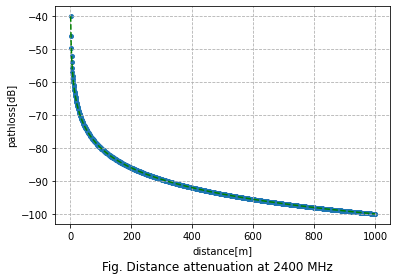

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
#import japanize_matplotlib      # 日本語フォントが使える

SPEED_OF_LIGHT = 299792458.0    # 光速[m/s]
DIV_N = 1000.0                  # 横軸データ分割数

# 減衰値計算
def CalcPathloss(freq, d):
    _lambda = SPEED_OF_LIGHT / freq             # 波長計算，lambdaは予約語なので_lambdaとした
    loss = (4.0 * np.pi * d / _lambda) **2      # 減衰値の計算
    return loss

# グラフ描画
def PlotPathloss(freq, d, loss_db):
    fig_title = 'Fig. Distance attenuation at %d MHz'%(freq / (10**6))      # figureオブジェクトタイトルの内容
    fig = plt.figure()                                                      # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    plt.suptitle(fig_title, x = 0.5, y = 0)       # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    ax = fig.add_subplot(111)           # figに属するAxesオブジェクトを作成（1行1列1番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax.set_xlabel('distance[m]')        # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax.set_ylabel('pathloss[dB]')       # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax.grid(linestyle='--')             # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax.scatter(d, loss_db, s = 16)      # 散布図，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    ## 折れ線グラフ
#    plt.plot(d, loss_db, 'b-o')         # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    ## 2次スプライン補完によるグラフ
    d1 = np.arange(dist / DIV_N, dist , dist / (DIV_N * 10))        # 補完用横軸データ
    func_ip6 = interpolate.interp1d(d, loss_db, kind='quadratic')   # 2次スプライン補完，https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
    loss_db1 = func_ip6(d1);                                        # 補完関数で縦軸データ計算
    ax.plot(d1, loss_db1, 'g--')                                    # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    plt.show()                  # すべてのfigureオブジェクトを表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show

# モジュールが直接実行されたときの処理
if __name__ == '__main__':
    ## 入力部
    print('Frequency[MHz]: ', end='')
    freq = float(input()) * 10**6
    print('Max Distance[m]: ', end='')
    dist = float(input())
    ## 演算部
    d = np.arange(dist / DIV_N, dist + dist / DIV_N, dist / DIV_N)     # 横軸データ生成，https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    loss = CalcPathloss(freq, d)        # 減衰量計算
    loss_db = -10.0 * np.log10(loss)    # 減衰量計算[dB]換算
    PlotPathloss(freq, d, loss_db)      # グラフ描画

Frequency[MHz]: 2400
Max Distance[m]: 1000
 
-0.02588 x - 78.45


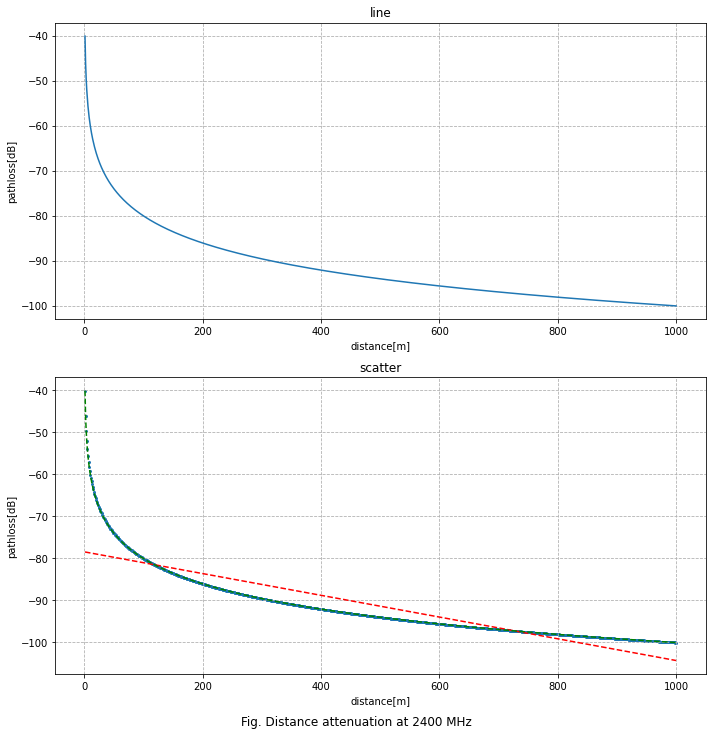

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from google.colab import files

SPEED_OF_LIGHT = 299792458.0    # 光速[m/s]
DIV_N = 1000.0                  # 横軸データ分割数

# 減衰値計算
def CalcPathloss(freq, d):
    _lambda = SPEED_OF_LIGHT / freq             # 波長計算，lambdaは予約語なので_lambdaとした
    loss = (4.0 * np.pi * d / _lambda) **2      # 減衰値の計算
    loss_db = -10.0 * np.log10(loss)            # 減衰値[dB]換算
    return loss_db

# グラフ描画
def PlotPathloss(freq, d, loss_db):
    fig_title = 'Fig. Distance attenuation at %d MHz'%(freq / (10**6))      # figureオブジェクトタイトルの内容
    fig = plt.figure(figsize=(10,10))                                       # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    fig.suptitle(fig_title, x = 0.5, y = 0, fontfamily= 'sans-serif')       # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    ax1 = fig.add_subplot(211)          # figに属するAxesオブジェクトを作成（2行1列1番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax1.set_title('line')               # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax1.set_xlabel('distance[m]')       # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax1.set_ylabel('pathloss[dB]')      # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax1.grid(linestyle='--')            # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax1.plot(d, loss_db, drawstyle='default')        # 折れ線グラフ，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# グラフ練習用
    ## 散布図
    ax2 = fig.add_subplot(212)          # figに属するAxesオブジェクトを作成（2行1列2番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax2.set_title('scatter')            # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax2.set_xlabel('distance[m]')       # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax2.set_ylabel('pathloss[dB]')      # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax2.grid(linestyle='--')            # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
#    ax2.xscale("log")
    ax2.scatter(d, loss_db, s = 4)      # 散布図，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    ## 多項式近似
    fitpoly_order = 1                                            # 近似線の多項式の次数
    coefficient_poly = np.polyfit(d, loss_db, fitpoly_order)     # 近似係数データの並び，https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit
    func_poly = np.poly1d(coefficient_poly)                      # 多項式表現，https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d
    print(func_poly)                                             # 近似線の多項式表示
    loss_db_l = func_poly(d)                                     # 多項式表現の式で縦軸データ計算
    ax2.plot(d, loss_db_l, 'r--')                                # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    ## 補完線
    d1 = np.arange(dist / DIV_N, dist , dist / (DIV_N * 10))          # 補完用横軸データ
    func_ip6 = interpolate.interp1d(d, loss_db, kind='quadratic')     # 2次スプライン補完，https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
    loss_db1 = func_ip6(d1);                                          # 補完関数で縦軸データ計算
    ax2.plot(d1, loss_db1, 'g--')                                     # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    fig.tight_layout()          # グラフ描画領域が重複しないようにレイアウト調整
    fig.show()                  # すべてのfigureオブジェクトを表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show
#    fig.savefig("test.png")     # 画像ファイル保存，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#    files.download("test.png")  # 画像ファイルダウンロード，https://colab.research.google.com/notebooks/io.ipynb?hl=ja#scrollTo=hauvGV4hV-Mh

# モジュールが直接実行されたときの処理
if __name__ == '__main__':
    ## 入力部
    print('Frequency[MHz]: ', end='')
    freq = float(input()) * 10**6
    print('Max Distance[m]: ', end='')
    dist = float(input())
    ## 演算部
    d = np.arange(dist / DIV_N, dist + dist / DIV_N, dist / DIV_N)     # 横軸データ生成，https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    loss_db = CalcPathloss(freq, d)        # 減衰量計算
    PlotPathloss(freq, d, loss_db)         # グラフ描画

# 02_マルチパス波による合成波の波形

Interface2021年5月号pp.25-27を参考<br>
(参考)https://techweb.rohm.co.jp/iot/knowledge/iot01/s-iot01/01-s-iot01/1844<br>
<br>
図2に示すように，送信アンテナから受信アンテナまで，直接波のほかに反射波など複数の経路（**マルチパス**）を通って受信アンテナに到達する電波のエネルギーがあります。これらは受信アンテナで合成され，受信信号となります。個々の反射波などは経路長が違うため，減衰量が異なるだけではなく，伝搬遅延による位相のずれが生じます。位相の異なる電波による干渉が起こると，電波を強め合ったり打ち明けし合ったりして，受信磁界強度が大きく変わります。これを「**フェージング**」と言います。<br>
⇒　直接波とマルチパス波が同位相($0$ deg)だと強め合う<br>
⇒　直接波とマルチパス波が逆位相($180$ deg)だと弱め合う<br>


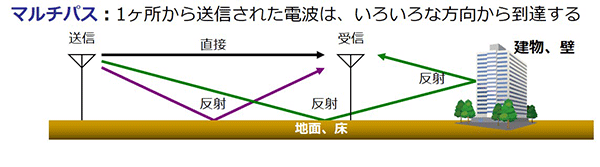
<br>
図2　マルチパス

マルチパス波の位相差θ(<360)[deg]: 180
マルチパス波の減衰(真の振幅)L(<1): 0.5
α:直接波
β:マルチパス波(1波のみ)


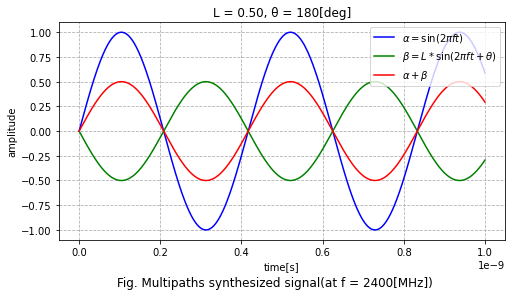

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files

sample_rate = 1.0e12    # サンプリング・レート[Hz]
carrier_freq = 2.4e9    # 搬送波の周波数[Hz]
duration = 1.0e-9       # 信号の期間[s]

def GenerateMultiSynSig(t, mp_phase, mp_att):
    d_wave = np.sin(2.0 * np.pi * carrier_freq * t)                        # 縦軸データ1，直接波
    m1_wave = np.sin(2.0 * np.pi * carrier_freq * t + mp_phase) * mp_att   # 縦軸データ2，マルチパス波
    syn_wave = d_wave + m1_wave                                            # 縦軸データ3，合成波
    return d_wave, m1_wave, syn_wave

def PlotMultiPathsFading(t, wave):
    print('\N{greek small letter alpha}:直接波')
    print('\N{greek small letter beta}:マルチパス波(1波のみ)')

    fig_title = 'Fig. Multipaths synthesized signal(at f = %d[MHz])'%(carrier_freq / 10**6)      # figureオブジェクトタイトルの内容
    fig = plt.figure(figsize=(8,4))                                                              # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    fig.suptitle(fig_title, x = 0.5, y = 0, fontfamily= 'sans-serif')                            # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    ax = fig.add_subplot(111)       # figに属するAxesオブジェクトを作成（1行1列1番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax.set_xlabel('time[s]')        # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax.set_ylabel('amplitude')      # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax.grid(linestyle='--')         # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax_title = 'L = %.2f, \N{greek small letter theta} = %.0f[deg]'%(mp_att, mp_phase_deg)            # axオブジェクトタイトルの内容
    ax.set_title(ax_title)          # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html

    ax.plot(t, wave[0], 'b', label = r'$\alpha=\sin(2\pi ft)$')
    ax.plot(t, wave[1], 'g', label = r'$\beta=L*\sin(2\pi ft+\theta)$')
    ax.plot(t, wave[2], 'r', label = r'$\alpha+\beta$')
    ax.legend(loc = 'upper right')  # 凡例の配置（右上），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    fig.show()                      # すべてのfigureオブジェクトを表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show
#    fig.savefig("test.png")     # 画像ファイル保存，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#    files.download("test.png")  # 画像ファイルダウンロード，https://colab.research.google.com/notebooks/io.ipynb?hl=ja#scrollTo=hauvGV4hV-Mh

# モジュールが直接実行されたときの処理
if __name__ == '__main__':
    ## 入力部
    print('マルチパス波の位相差\N{greek small letter theta}(<360)[deg]: ', end='')  # マルチパス波の位相差[deg]
    mp_phase_deg = float(input())
    mp_phase = mp_phase_deg / 180.0 * np.pi                                         # 単位換算[deg]->[rad] 
    print('マルチパス波の減衰(真の振幅)L(<1): ', end='')                            # マルチパス波の減衰
    mp_att = float(input())
    ## 演算部
    t = np.arange(0, duration, 1 / sample_rate)                         # 横軸データ生成
    wave_data = GenerateMultiSynSig(t, mp_phase, mp_att)                # 直接波とマルチパス波の合成
    PlotMultiPathsFading(t, wave_data)                                  # グラフ描画

# 03_振幅変調（AM；Amplitude Modulation)

Interface2021年5月号p.34を参考<br>
（参考）https://www.den-gyo.com/labo/kouza/radio03.html<br>
（参考）https://www.ni.com/ja-jp/innovations/white-papers/06/amplitude-modulation.html<br>
（参考）https://nippon.zaidan.info/seikabutsu/2005/00138/contents/0017.htm<br>
<br>
無線通信では，音声やデータ等の情報を無線で遠方に伝えるために，電波（搬送波）に音声やデータを乗せています。この技術を**変調**（Modulation）といいます。
変調では，搬送波の振幅や周波数や位相を連続的に変化させます。それぞれ，**振幅変調**（**AM**），**周波数変調**（**FM**），**位相変調**（**PM**）といいます。<br>
振幅復調の原理を図3-1に示す。
* 信号波:<br>
$$
v_s=V_s\sin(2\pi f_s t+\phi_s)
$$
* 搬送波：<br>
$$
v_c=V_c\sin(2\pi f_c t+\phi_c)
$$
* AM変調波：搬送波の振幅は変わるが，周波数と初期位相は変わらない<br>
$$
v_m=V_m\sin(2\pi f_c t+\phi_c)
$$
$f_c>>f_s$のとき，搬送波の時間的な変化はほぼ影響しないとみなして，$V_m=V_c+V_s\sin(2\pi f_s t+\phi_s)$<br>
よって，AM変調波は次のように与えられる。
\begin{align}
v_m &= (V_c+V_s\sin(2\pi f_s t+\phi_s))\sin(2\pi f_c t+\phi_c) \\
&=V_c\sin(2\pi f_c t+\phi_c)+V_s\sin(2\pi f_s t+\phi_s)\sin(2\pi f_c t+\phi_c)\\
&=v_c+v_s\frac{v_c}{V_c} \\
&=v_c+\frac{1}{V_c}v_s v_c
\end{align}
また，図3-2に示すように，AM変調した波形から変調度$m$を次のように与えられる。<br>
$$
m=\frac{V_s}{V_c}
$$
信号波と搬送波の周波数に着目して，AM変調波を考える。<br>
\begin{align}
v_m &= (V_c+V_s\sin(2\pi f_s t+\phi_s))\sin(2\pi f_c t+\phi_c) \\
&= (V_c+m V_c\sin(2\pi f_s t+\phi_s))\sin(2\pi f_c t+\phi_c)= V_c(1+m\sin(2\pi f_s t+\phi_s))\sin(2\pi f_c t+\phi_c) \\
&= V_c\sin(2\pi f_c t+\phi_c)+m V_c\sin(2\pi f_c t+\phi_c)\sin(2\pi f_s t+\phi_s) \\
&= V_c\sin(2\pi f_c t+\phi_c)-\frac{m V_c}{2}\cos(2\pi(f_c +f_s)t+(\phi_c+\phi_s))+\frac{m V_c}{2}\cos(2\pi(f_c -f_s)t+(\phi_c-\phi_s)) \\
&= V_c\sin(2\pi f_c t+\phi_c)-\frac{m V_c}{2}\sin(2\pi(f_c +f_s)t+(\phi_c+\phi_s+\frac{\pi}{2}))+\frac{m V_c}{2}\sin(2\pi(f_c -f_s)t+(\phi_c-\phi_s+\frac{\pi}{2})) \\
&= V_c\sin(2\pi f_c t+\phi_c)+\frac{m V_c}{2}\sin(2\pi(f_c +f_s)t+(\phi_c+\phi_s+\frac{3\pi}{2}))+\frac{m V_c}{2}\sin(2\pi(f_c -f_s)t+(\phi_c-\phi_s+\frac{\pi}{2})) \\
&= V_c\sin(2\pi f_c t+\phi_c)+\frac{m V_c}{2}\sin(2\pi(f_c +f_s)t+(\phi_c+\phi_s-\frac{\pi}{2}))+\frac{m V_c}{2}\sin(2\pi(f_c -f_s)t+(\phi_c-\phi_s+\frac{\pi}{2}))
\end{align}
AM変調波には，$f_c$，$f_c+f_s$，$f_c-f_s$の3つの周波数成分が含まれていることがわかる。


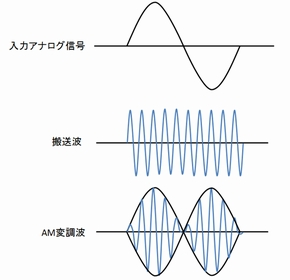<br>
図3-1．振幅変調

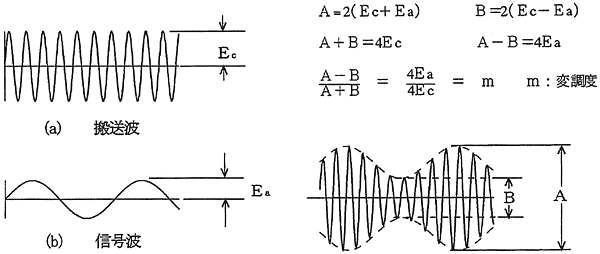<br>
図3-2　変調度

変調度m: 0.8
sample_rate = 8192000[Hz]
4096


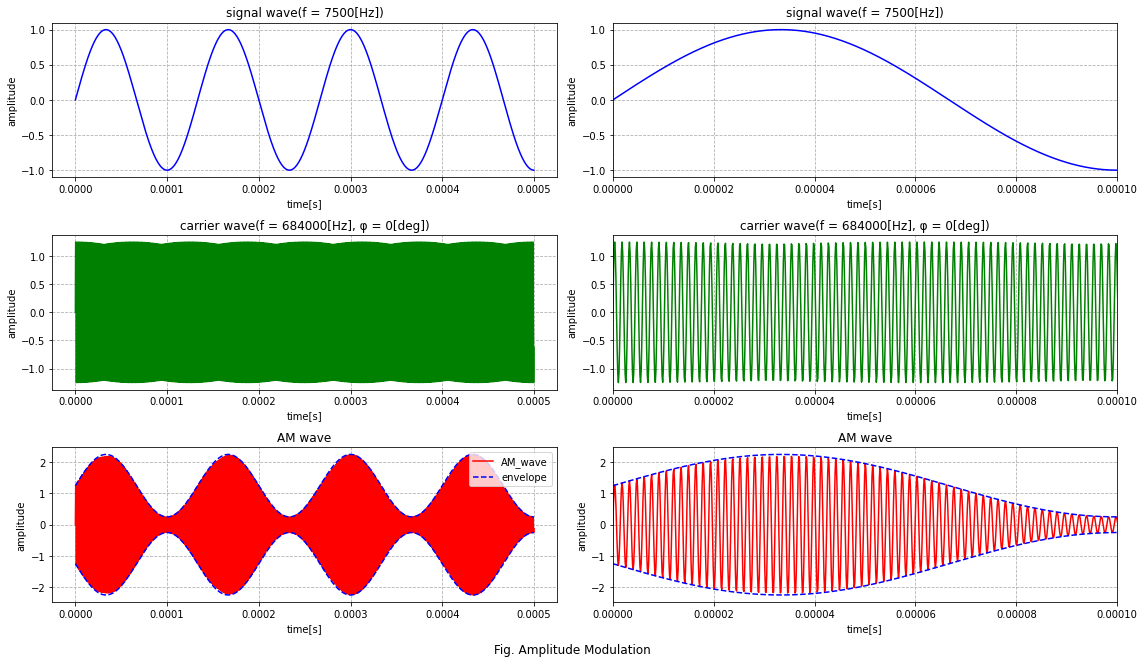

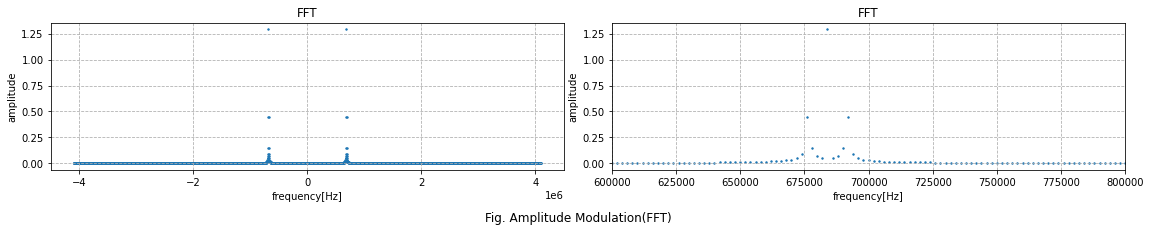

In [ ]:
from re import X
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from google.colab import files

signal_amp = 1.0                        # 信号波の振幅
signal_freq = 7.5e3                     # 信号波の周波数[Hz]
signal_phi = 0.0                        # 信号波の初期位相[deg]
carrier_freq = 684e3                    # 搬送波の周波数[Hz]
carrier_phi = 0.0                       # 搬送波の初期位相[deg]
duration = 0.5e-3                       # 信号の期間[s]
sample_rate = 1/ (duration / (2**12))   # サンプリング・レート[Hz]
#sample_rate = 1.0e7                    # サンプリング・レート[Hz] 

def GenerateAMSignal(t, m):
    signal_wave = signal_amp * np.sin(2.0 * np.pi * signal_freq * t + signal_phi / 180.0 * np.pi)
    carrier_amp = signal_amp / m
    carrier_wave = carrier_amp * np.sin(2.0 * np.pi * carrier_freq * t + carrier_phi / 180.0 * np.pi)
    am_wave =  carrier_wave + 1 / carrier_amp * carrier_wave * signal_wave

    return signal_wave, carrier_wave, am_wave

def PlotAM(t, m, wave_data):
    fig_title = 'Fig. Amplitude Modulation'                             # figureオブジェクトタイトルの内容
    fig = plt.figure(figsize=(16,9))                                    # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    fig.suptitle(fig_title, x = 0.5, y = 0, fontfamily= 'sans-serif')   # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    ax1 = fig.add_subplot(321)      # figに属するAxesオブジェクトを作成（3行2列1番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax1.set_xlabel('time[s]')       # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax1.set_ylabel('amplitude')     # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax1_title = 'signal wave(f = %.0f[Hz])'%(signal_freq)               # axオブジェクトタイトルの内容
    ax1.set_title(ax1_title)        # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax1.grid(linestyle='--')        # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax1.plot(t, wave_data[0], 'b')  # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    ax1_1 = fig.add_subplot(322)    # figに属するAxesオブジェクトを作成（3行2列2番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax1_1.set_xlabel('time[s]')     # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax1_1.set_ylabel('amplitude')   # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax1_1_title = 'signal wave(f = %.0f[Hz])'%(signal_freq)             # axオブジェクトタイトルの内容
    ax1_1.set_title(ax1_1_title)    # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax1_1.grid(linestyle='--')      # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax1_1.set_xlim(0, duration * 0.2)   # 横軸範囲設定    
    ax1_1.plot(t, wave_data[0], 'b')    # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    ax2 = fig.add_subplot(323)      # figに属するAxesオブジェクトを作成（3行2列3番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax2.set_xlabel('time[s]')       # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax2.set_ylabel('amplitude')     # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax2_title = 'carrier wave(f = %.0f[Hz], \N{greek small letter phi} = %.0f[deg])'%(carrier_freq, carrier_phi)            # axオブジェクトタイトルの内容
    ax2.set_title(ax2_title)        # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax2.grid(linestyle='--')        # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax2.plot(t, wave_data[1], 'g')  # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    ax2_1 = fig.add_subplot(324)    # figに属するAxesオブジェクトを作成（3行2列3番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax2_1.set_xlabel('time[s]')     # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax2_1.set_ylabel('amplitude')   # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax2_1_title = 'carrier wave(f = %.0f[Hz], \N{greek small letter phi} = %.0f[deg])'%(carrier_freq, carrier_phi)          # axオブジェクトタイトルの内容
    ax2_1.set_title(ax2_1_title)    # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax2_1.grid(linestyle='--')      # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax2_1.set_xlim(0, duration * 0.2)   # 横軸範囲設定 
    ax2_1.plot(t, wave_data[1], 'g')    # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

    ax3 = fig.add_subplot(325)      # figに属するAxesオブジェクトを作成（3行2列5番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax3.set_xlabel('time[s]')       # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax3.set_ylabel('amplitude')     # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax3_title = 'AM wave'           # axオブジェクトタイトルの内容
    ax3.set_title(ax3_title)        # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax3.grid(linestyle='--')        # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax3.plot(t, wave_data[2], 'r', label = 'AM_wave')               # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    ax3.plot(t, wave_data[0] + signal_amp / m, 'b--', label = 'envelope')   # 包絡線（上）
    ax3.plot(t, -(wave_data[0] + signal_amp / m), 'b--')                    # 包絡線（下）
    ax3.legend(loc = 'upper right') # 凡例の配置（右上），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

    ax3_1 = fig.add_subplot(326)    # figに属するAxesオブジェクトを作成（3行2列6番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax3_1.set_xlabel('time[s]')     # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax3_1.set_ylabel('amplitude')   # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax3_1_title = 'AM wave'         # axオブジェクトタイトルの内容
    ax3_1.set_title(ax3_1_title)    # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax3_1.grid(linestyle='--')      # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax3_1.set_xlim(0, duration * 0.2)   # 横軸範囲設定 
    ax3_1.plot(t, wave_data[2], 'r', label = 'AM_wave')                     # 折れ線グラフ（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    ax3_1.plot(t, wave_data[0] + signal_amp / m, 'b--', label = 'envelope')     # 包絡線
    ax3_1.plot(t, -(wave_data[0] + signal_amp / m), 'b--')                      # 包絡線
    ax3.legend(loc = 'upper right') # 凡例の配置（右上），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html


    fig.tight_layout()          # グラフ描画領域が重複しないようにレイアウト調整
    fig.show()
#    fig.savefig('test.png')     # 画像ファイル保存，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
#    files.download('test.png')  # 画像ファイルダウンロード，https://colab.research.google.com/notebooks/io.ipynb?hl=ja#scrollTo=hauvGV4hV-Mh

def PlotFFT(t, data):
    fig2_title = 'Fig. Amplitude Modulation(FFT)'                       # figureオブジェクトタイトルの内容
    fig2 = plt.figure(figsize=(16,3))                                   # figureオブジェクト生成，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    fig2.suptitle(fig2_title, x = 0.5, y = 0, fontfamily= 'sans-serif') # figオブジェクト内の指定位置（中央下部）にタイトル表示，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

    fft_data = np.fft.fft(data)
    n = int(len(fft_data))
    print(n)
    freq = np.fft.fftfreq(n, d = 1 / sample_rate)
    abs_amp =np.abs(fft_data) / n * 2  # 交流成分はデータ数で割って2倍する
 
    ax4 = fig2.add_subplot(121)         # figに属するAxesオブジェクトを作成（1行2列1番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax4.set_xlabel('frequency[Hz]')     # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax4.set_ylabel('amplitude')         # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax4_title = 'FFT'                   # axオブジェクトタイトルの内容
    ax4.set_title(ax4_title)            # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    ax4.grid(linestyle='--')            # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax4.scatter(freq, abs_amp, s = 2)   # 散布図

    ax4_1 = fig2.add_subplot(122)       # figに属するAxesオブジェクトを作成（1行2列2番目），https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
    ax4_1.set_xlabel('frequency[Hz]')   # 横軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    ax4_1.set_ylabel('amplitude')       # 縦軸ラベル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    ax4_1_title = 'FFT'                 # axオブジェクトタイトルの内容
    ax4_1.set_title(ax4_1_title)        # グラフタイトル，https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html   
    ax4_1.grid(linestyle='--')          # 目盛線（破線），https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    ax4_1.scatter(freq[1 : int(n / 2)], abs_amp[1 : int(n / 2)], s = 2)     # 散布図
    ax4_1.set_xlim(600000, 800000)      # 横軸範囲設定(搬送波付近)
 
    fig2.tight_layout()          # グラフ描画領域が重複しないようにレイアウト調整
    fig2.show()

# モジュールが直接実行されたときの処理
if __name__ == '__main__':
    print('変調度m: ', end='')  # 変調度m = 信号の振幅 / 搬送波の振幅
    m = float(input())

    print('sample_rate = %.0f[Hz]'%(sample_rate))
    t = np.arange(0, duration, 1 / sample_rate)
    wave_data = GenerateAMSignal(t, m)
    PlotAM(t, m, wave_data)
    PlotFFT(t, wave_data[2])